In [1]:
#plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import grid
import matplotlib.dates as mdates

#math operation
import numpy as np
import pandas as pd; pd.set_option('max_columns', 6)
import math

#import file from internet
import json
import urllib.request

#make images
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

def roundup(x, multi):
    return int(math.ceil(x / float(multi))) * multi

In [2]:
url_statistik = "https://banuacoders.com/api/pico/statistik"
json_statistik = urllib.request.urlopen(url_statistik).read().decode()
dict_statistik = json.loads(json_statistik)

nbOfDays = len(dict_statistik['data'])
statistik_data = dict_statistik['data'];

total_positive = []
total_recovered = []
total_death = []
total_rawat = []
daily_positive = []
date = []

#print(statistik_data)
for i in range(nbOfDays):
    total_positive.append(statistik_data[i]['cumulative_positive'])
    total_recovered.append(statistik_data[i]['cumulative_recovered'])
    total_death.append(statistik_data[i]['cumulative_death'])
    total_rawat.append(statistik_data[i]['cumulative_positive']-statistik_data[i]['cumulative_death']-statistik_data[i]['cumulative_recovered'])
    
    daily_positive.append(statistik_data[i]['positive'])
    if(i==52):
        date_with_year = "13 May 2020"
    else:
        date_with_year = statistik_data[i]['date']
    date_splitted = date_with_year.split()
    date.append(date_splitted[0] + " " + date_splitted[1])
    
print(total_rawat)

[0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 3, 2, 2, 3, 3, 2, 2, 10, 15, 15, 14, 14, 17, 17, 17, 19, 22, 22, 21, 23, 23, 26, 30, 30, 30, 31, 36, 36, 33, 45, 45, 45, 56, 55, 60, 60, 60, 68, 67, 79, 78, 86, 87, 87, 87, 85, 85, 85, 76, 76, 79, 70, 70, 68, 66, 70, 70, 70, 63, 63, 63, 61, 55, 54, 49, 62, 62, 62, 61, 60, 60, 68, 51, 46, 43, 39, 38, 39, 38, 37, 40, 35, 34, 31, 31, 27, 28, 28, 25, 24, 23, 22, 24, 22, 22, 21, 23, 23, 23, 22, 21, 21, 20, 14, 14, 14]


In [3]:
length_total_rawat = len(total_rawat)
length_day = 60
start_day = length_total_rawat-length_day
end_day = length_total_rawat

print(total_rawat[start_day:end_day])

print(start_day)

[85, 85, 76, 76, 79, 70, 70, 68, 66, 70, 70, 70, 63, 63, 63, 61, 55, 54, 49, 62, 62, 62, 61, 60, 60, 68, 51, 46, 43, 39, 38, 39, 38, 37, 40, 35, 34, 31, 31, 27, 28, 28, 25, 24, 23, 22, 24, 22, 22, 21, 23, 23, 23, 22, 21, 21, 20, 14, 14, 14]
58


In [58]:
def draw_bar_diagram(rawat, sembuh, meninggal, positif):
    
    if(len(rawat)>60):
        begin = len(rawat) - 60
        end = len(rawat)
        rawat_plot = rawat[begin:end]
        sembuh_plot = sembuh[begin:end]
        meninggal_plot = meninggal[begin:end]
    else:
        begin = 0
        end = len(rawat)
        rawat_plot = rawat
        sembuh_plot= sembuh
        meninggal_plot = meninggal
        
    plotdata = pd.DataFrame({
        "Dirawat":rawat_plot,
        "Sembuh":sembuh_plot,
        "Meninggal": meninggal_plot
        }, 
    )

    nbOfDays = len(rawat_plot)
    index=np.arange(nbOfDays)
    colors = ['#eee657','#2cc990','#fc6042']
    ax = plotdata.plot(kind='bar', stacked=True, color = colors)

    new_date = []
    for i in range(0, nbOfDays, 5):
        new_date.append(date[i+begin])

    max_val = roundup(positif[end-1], 25)
    interval = int(max_val/5)
    
    plt.xticks(range(0, len(index), 5), new_date, rotation=90)
    plt.yticks(range(0, max_val+10, interval), range(0, 250, interval))
    plt.ylabel('Jumlah Kasus')

    #ax.get_legend().remove()
    ax.legend(loc=2, prop={'size': 10})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    #plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    #xint = range(0, nbOfDays, 2)
    #matplotlib.pyplot.xticks(xint)

    plt.gcf().set_size_inches(w=10,h=5)
    #ax.set_axisbelow(True)
    #matplotlib.pyplot.grid(b=None, which='major', axis='y', color='k', linestyle='--', linewidth=1.25)
    plt.savefig('../Images/KasusPositif.png', dpi=300, transparent=True)

14 Jul
31 Mar


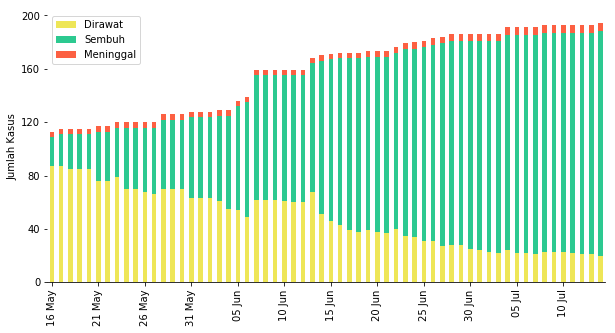

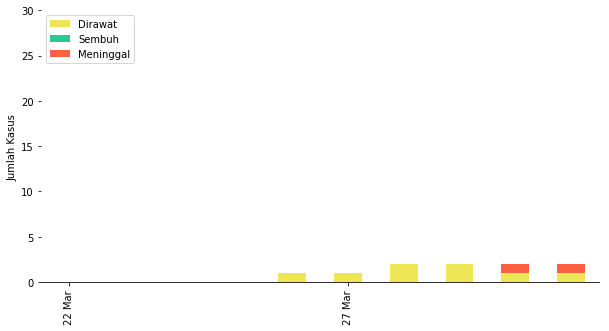

In [59]:
end = 115
draw_bar_diagram(total_rawat[:end], total_recovered[:end], total_death[:end], total_positive[:end])
here = len(total_rawat[:end])
print(date[here-1])

end = 10
draw_bar_diagram(total_rawat[:end], total_recovered[:end], total_death[:end], total_positive[:end])
here = len(total_rawat[:end])
print(date[here-1])

In [45]:
def draw_pie_chart(rawat, sembuh, meninggal):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Meninggal', 'Dirawat', 'Sembuh'
    sizes = [meninggal, rawat, sembuh]
    explode = (0.05, 0.05 ,0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

    colors = ['#fc6042', '#eee657', '#2cc990']

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%',
            shadow=False, startangle=180, pctdistance=0.8)# Equal aspect ratio ensures that pie is drawn as a circle

    centre_circle = plt.Circle((0,0),0.6,fc='white')

    

    plt.gcf().set_size_inches(w=2.5,h=2.5)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    ax1.axis('equal')
    plt.tight_layout()

    plt.savefig('../Images/percentage.png', dpi=600, transparent=True)

    plt.show()

In [9]:
if(i==52):
    date_with_year = "13 May 2020"
else:
    date_with_year = statistik_data[i]['date']
    date_splitted = date_with_year.split()
    date.append(date_splitted[0] + " " + date_splitted[1])

In [16]:
def make_image(index, date):
    
    im1 = Image.open('../Images/Artboard6.png')
    im2 = Image.open('../Images/KasusPositif.png')
    im3 = Image.open('../Images/percentage.png')
    font = ImageFont.truetype("../Font/tt0145m_.ttf", 40)

    im2_w_goal = 750
    divider = im2.width/im2_w_goal
    im2_x_off = -10
    im2_y_off = 50
    im2_w = int(im2.width / divider)
    im2_h = int(im2.height / divider)
    im_resized = im2.resize((im2_w, im2_h))

    im3_w_goal = 300
    divider = im3.width/im3_w_goal
    im3_x_off = 50
    im3_y_off = 410
    im3_w = int(im3.width / divider)
    im3_h = int(im3.height / divider)
    im_resized2 = im3.resize((im3_w, im3_h))

    draw = ImageDraw.Draw(im1)
    
    #font_small = ImageFont.truetype("../Font/tt0145m_.ttf", 12)
    #for i in range(0, 750, 50):
    #    draw.text((0, i),str(i),(0,0,0),font=font_small)
    #    draw.text((i, 0),str(i),(0,0,0),font=font_small)
        
    draw.text((450, 530),date,(0,0,0),font=font)
    
    back_im = im1.copy()
    back_im.paste(im_resized, (im2_x_off, im2_y_off), mask=im_resized)
    back_im.paste(im_resized2, (im3_x_off, im3_y_off), mask=im_resized2)

    title = '../Images/Result_Animation_' + str(index) + '.png'
    back_im.save(title, quality=100)
    #display(back_im)

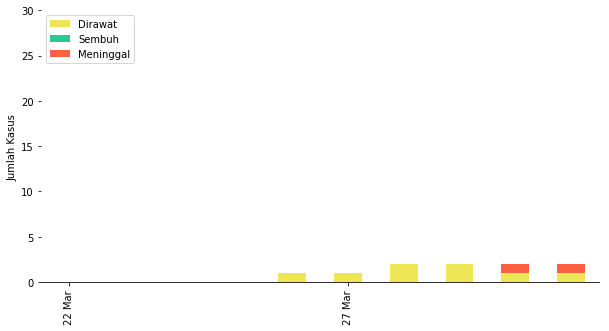

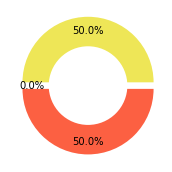

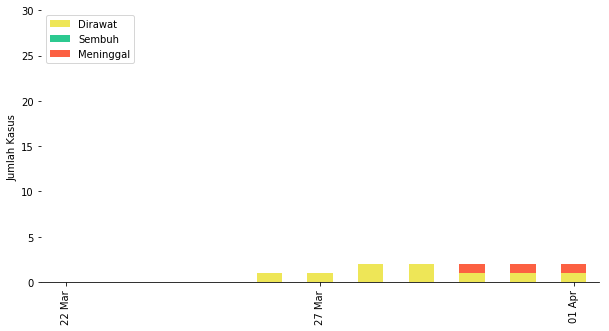

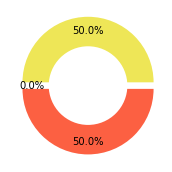

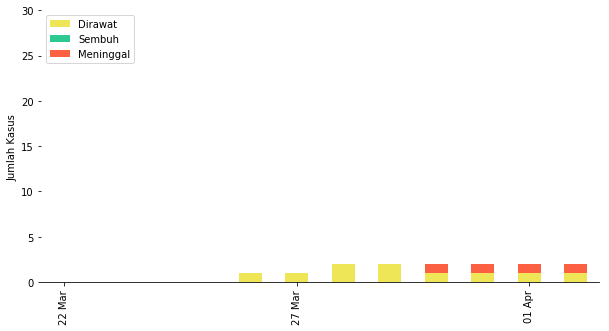

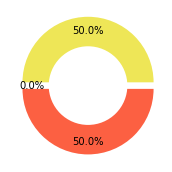

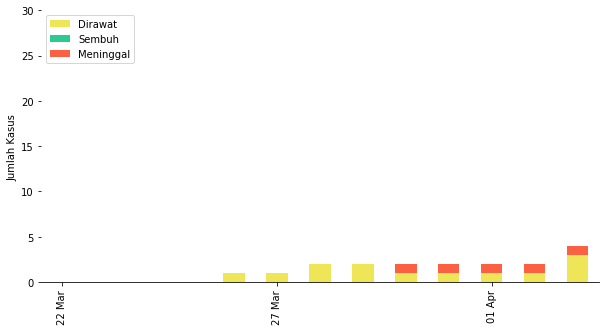

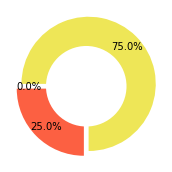

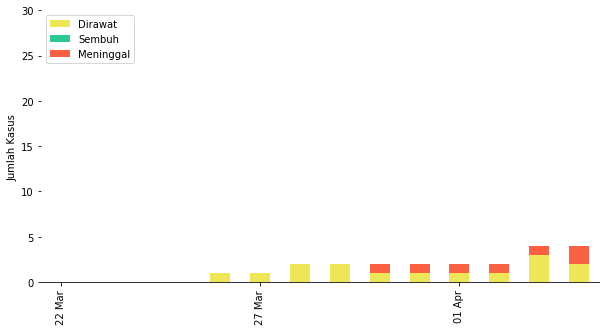

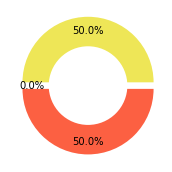

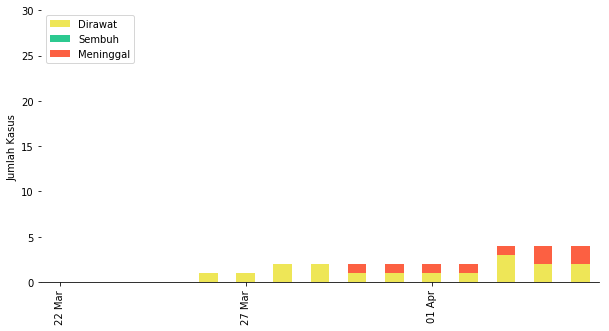

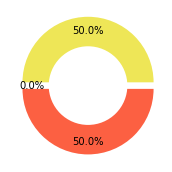

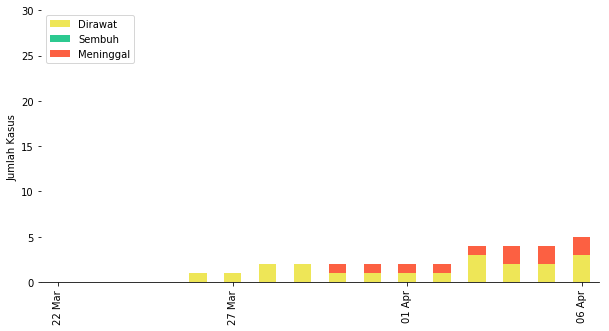

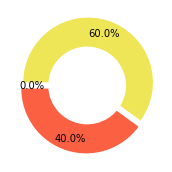

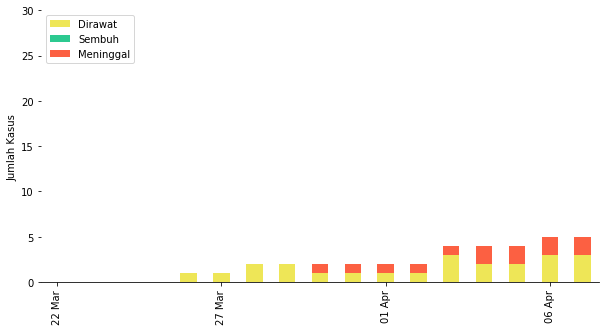

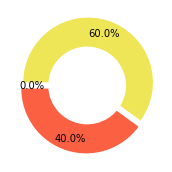

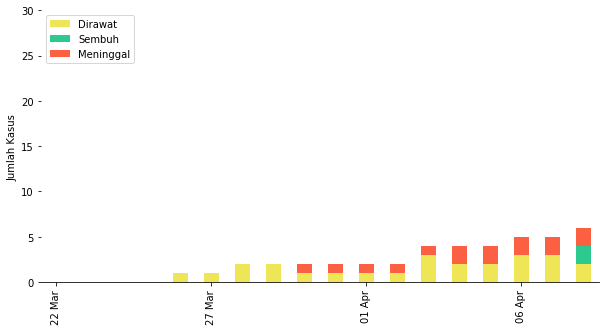

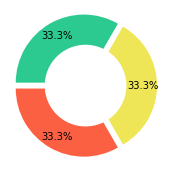

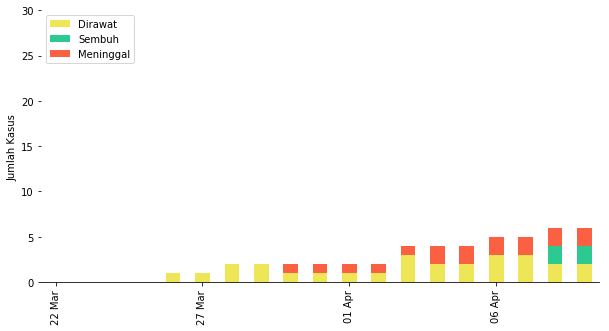

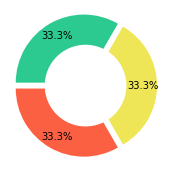

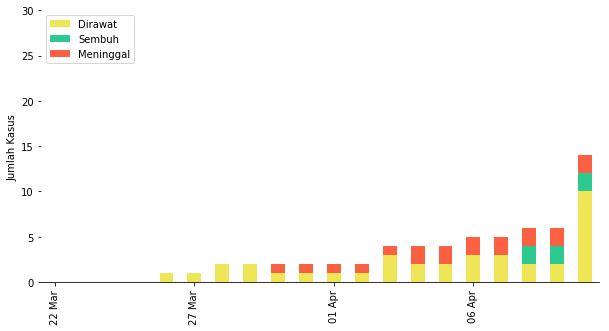

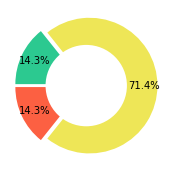

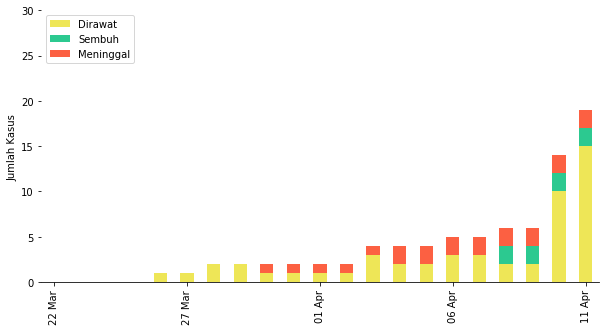

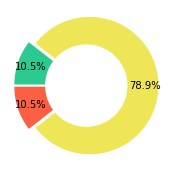

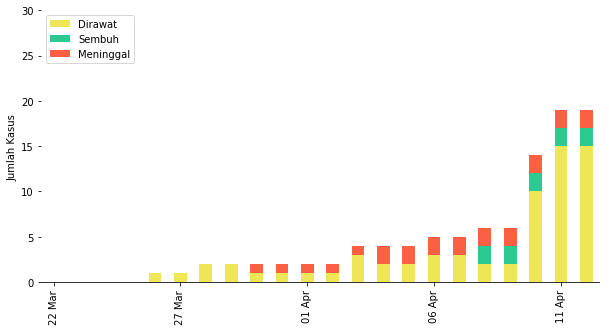

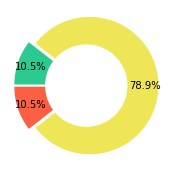

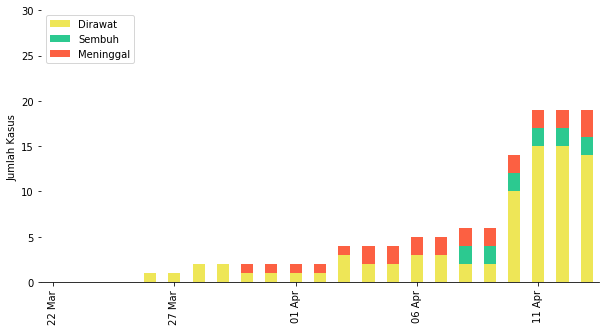

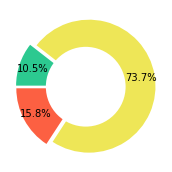

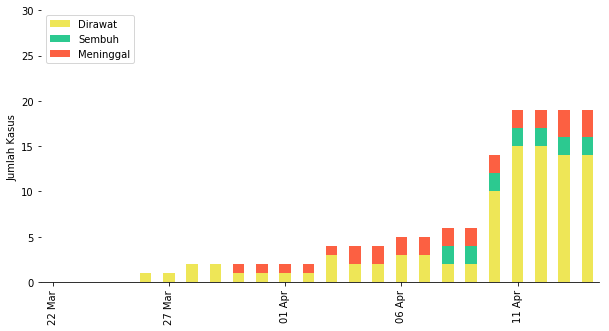

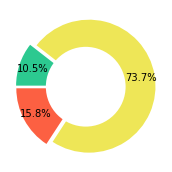

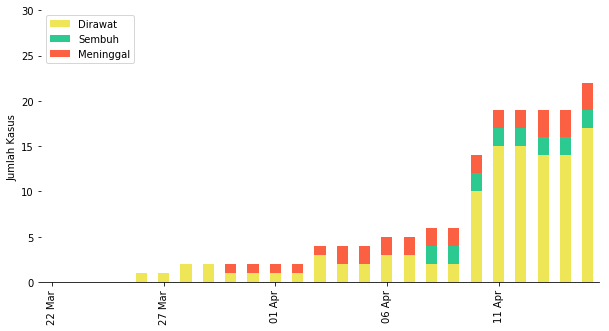

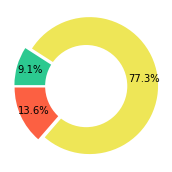

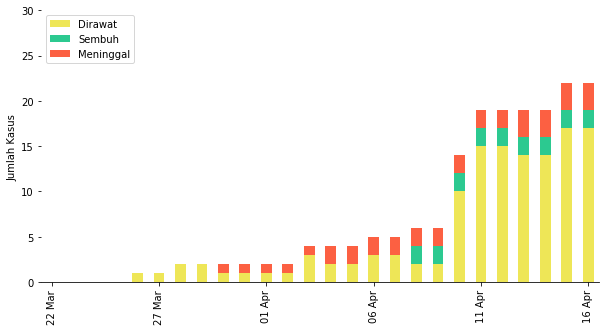

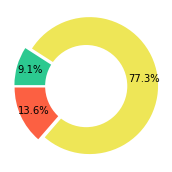

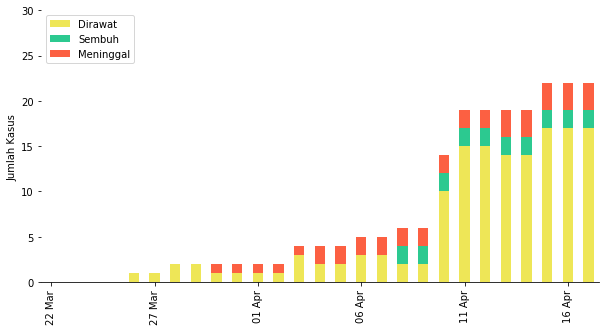

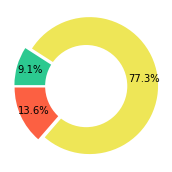

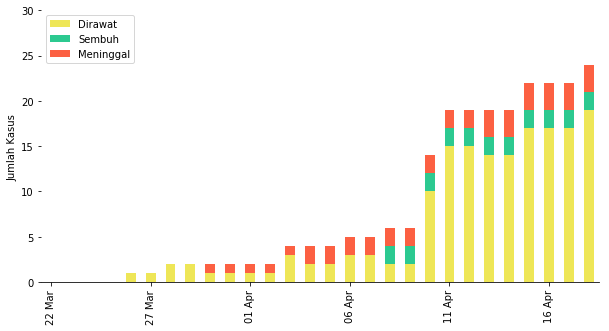

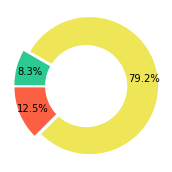

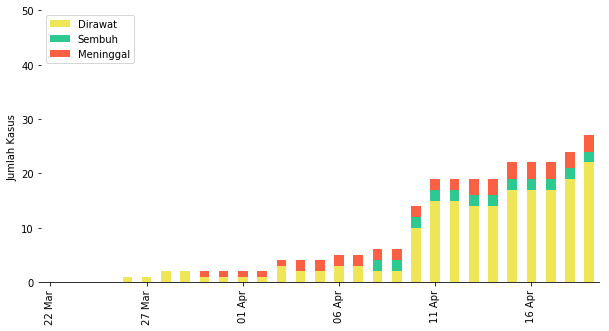

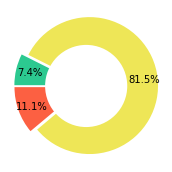

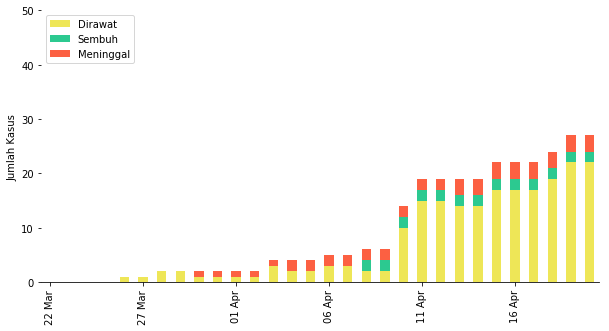

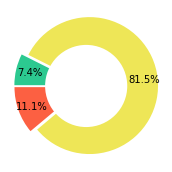

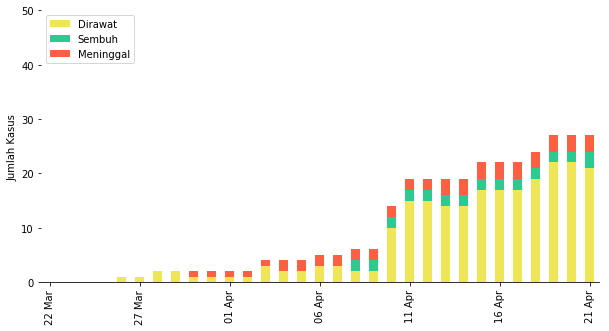

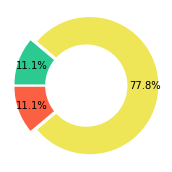

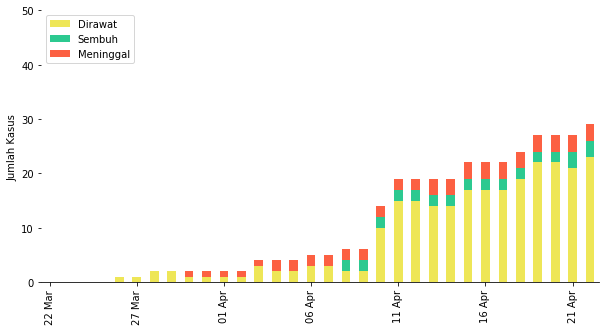

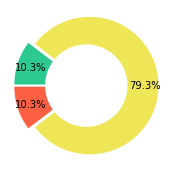

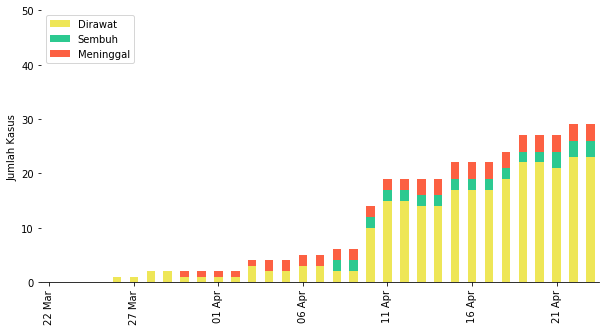

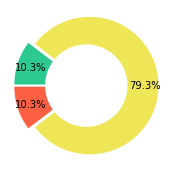

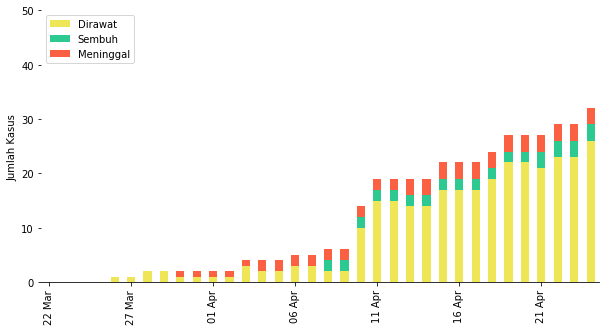

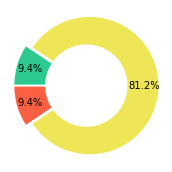

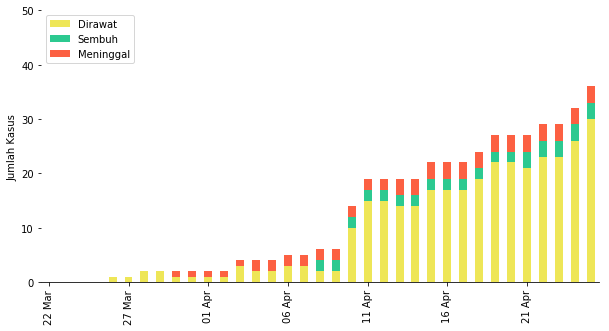

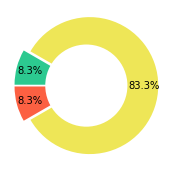

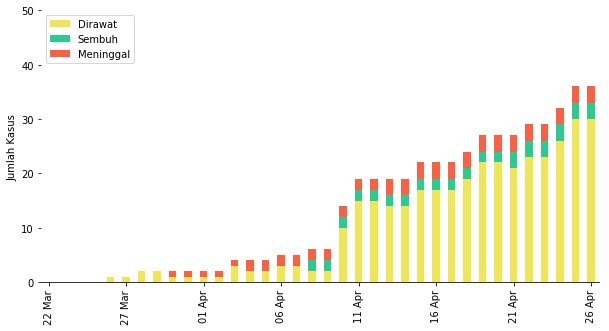

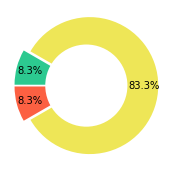

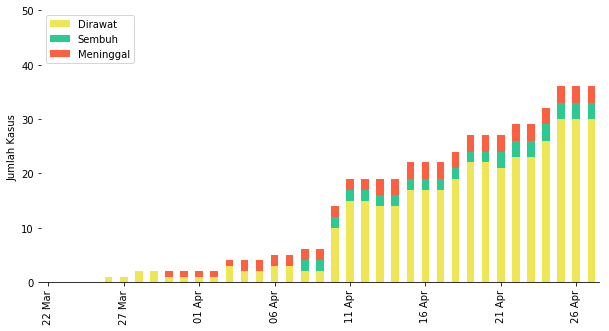

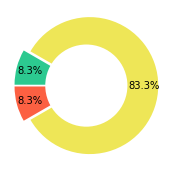

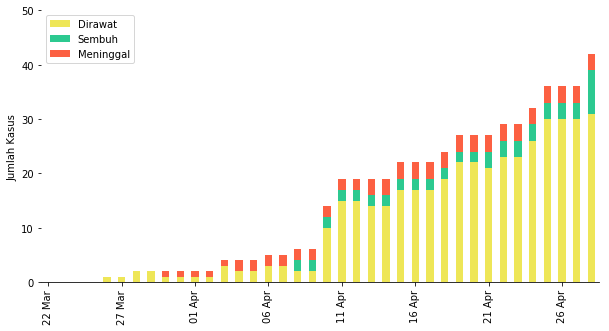

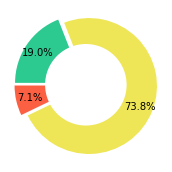

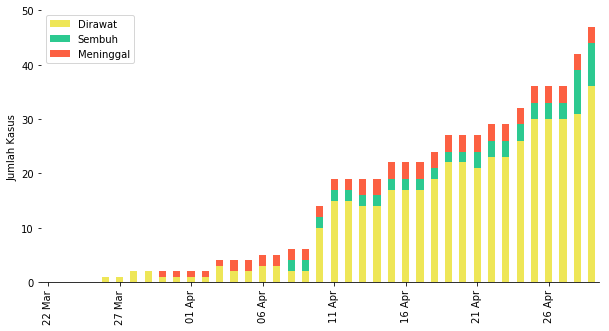

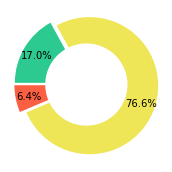

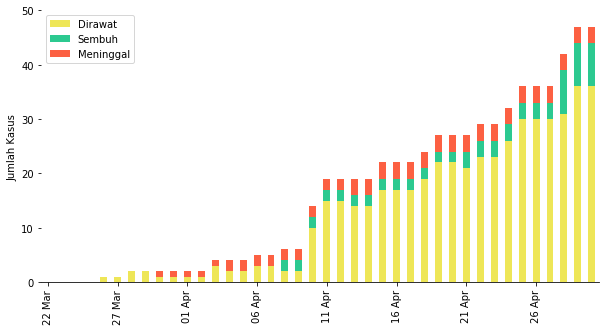

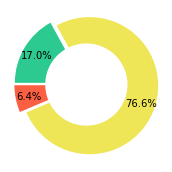

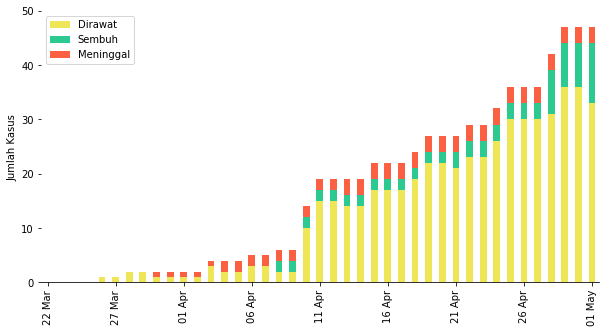

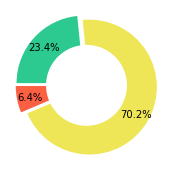

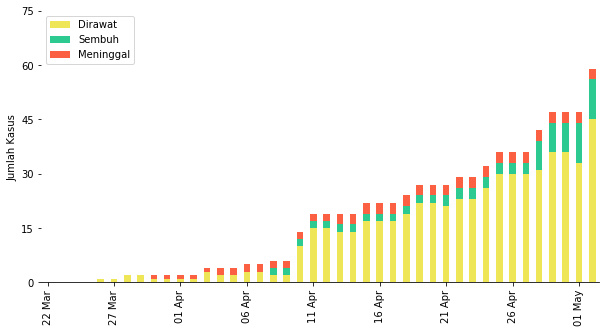

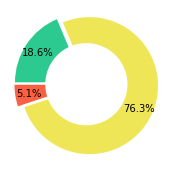

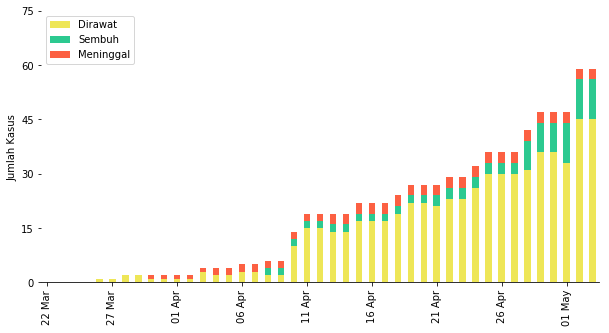

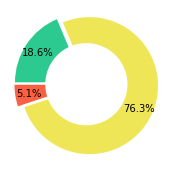

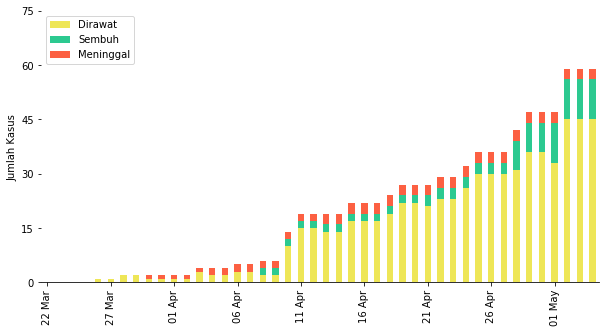

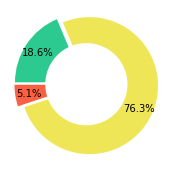

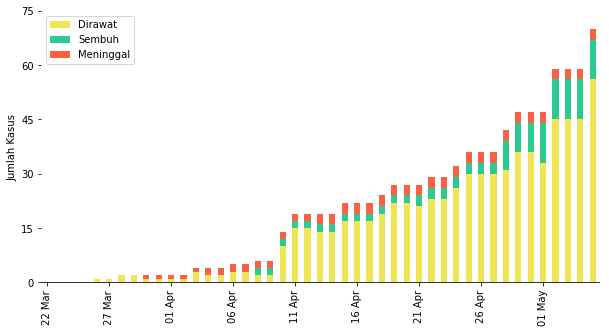

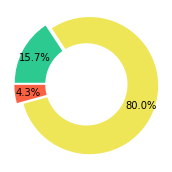

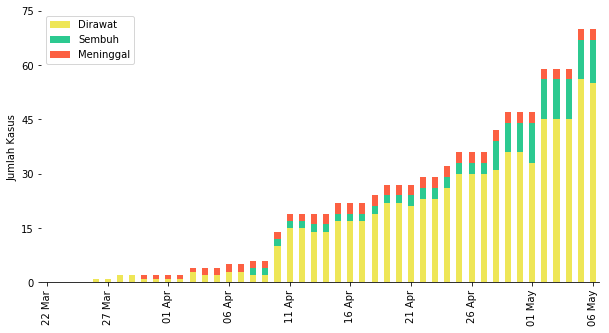

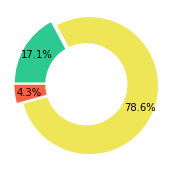

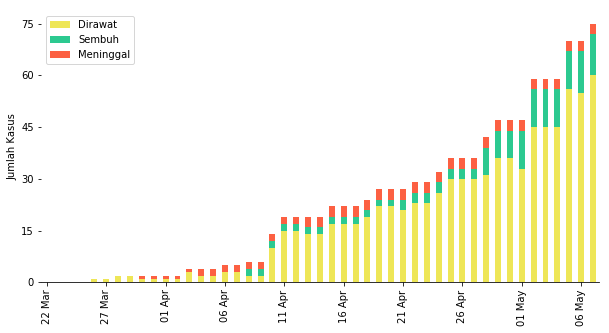

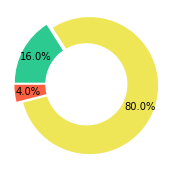

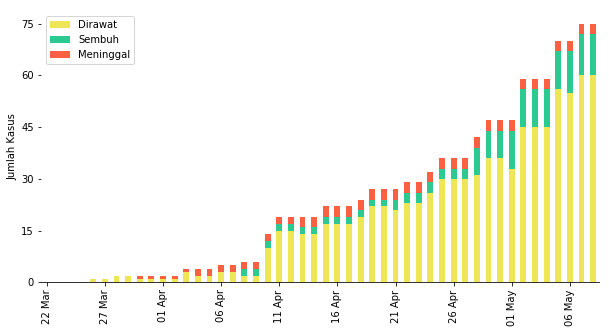

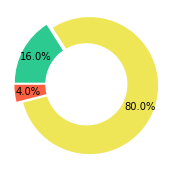

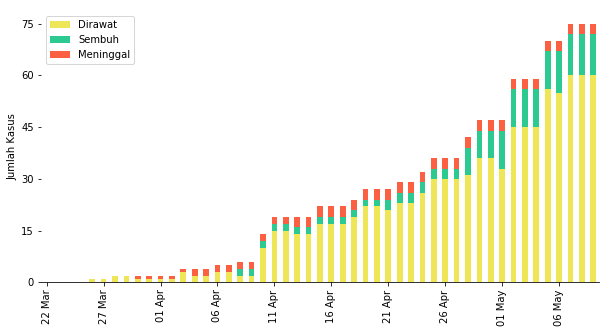

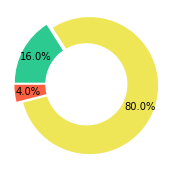

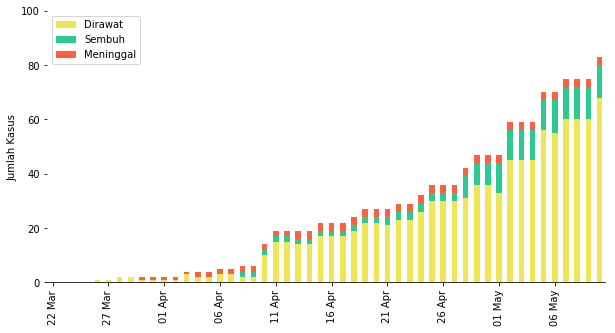

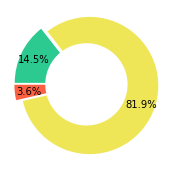

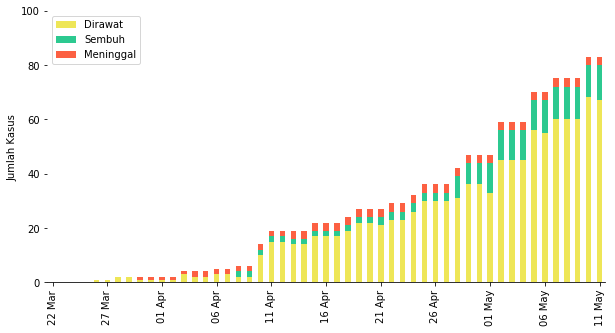

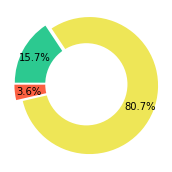

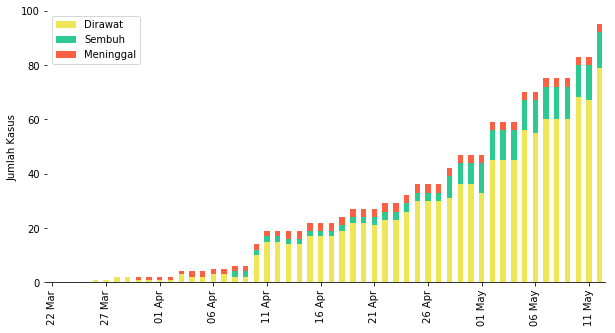

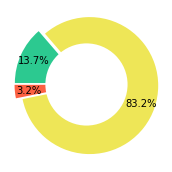

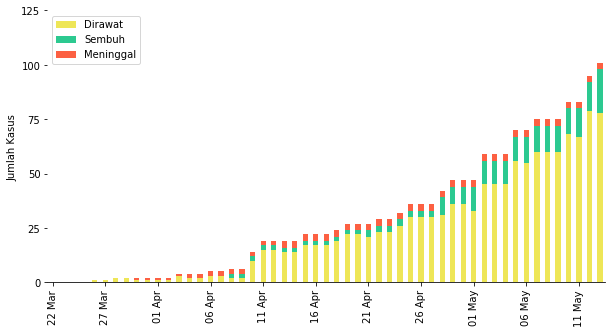

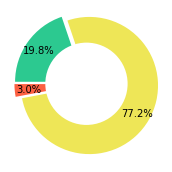

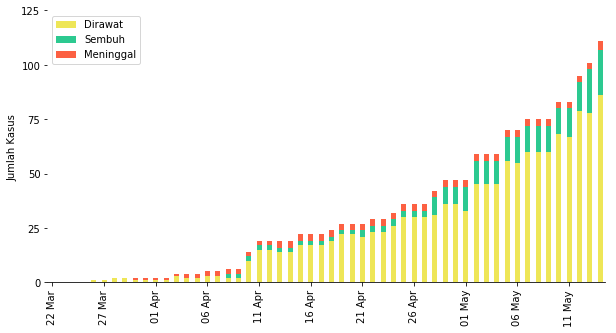

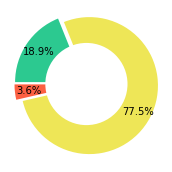

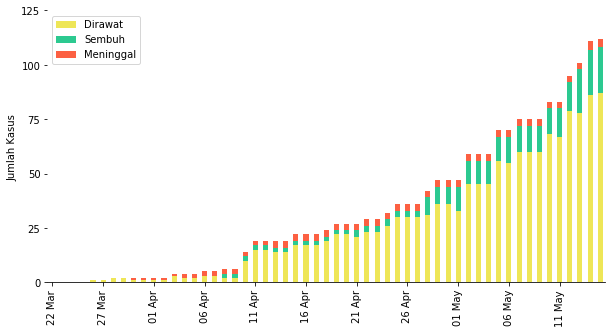

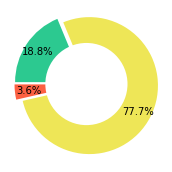

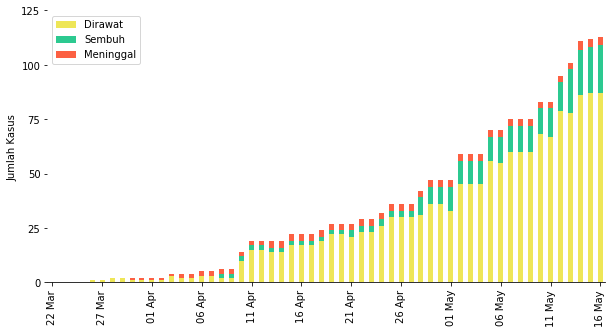

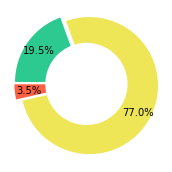

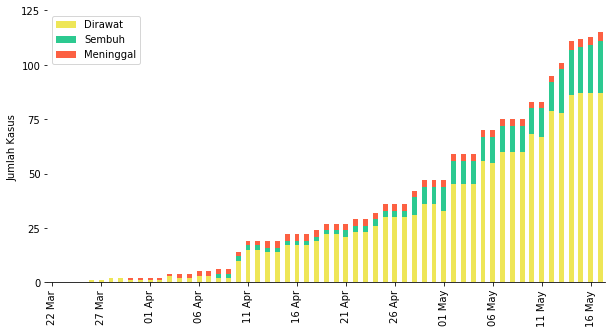

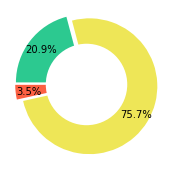

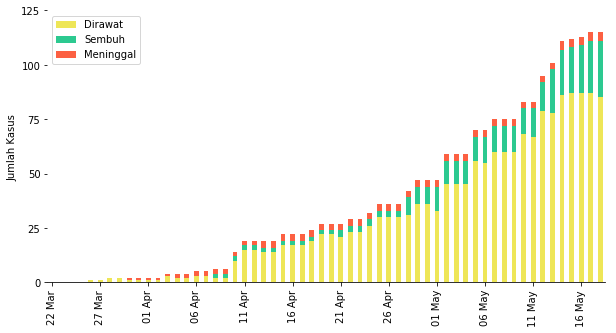

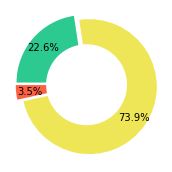

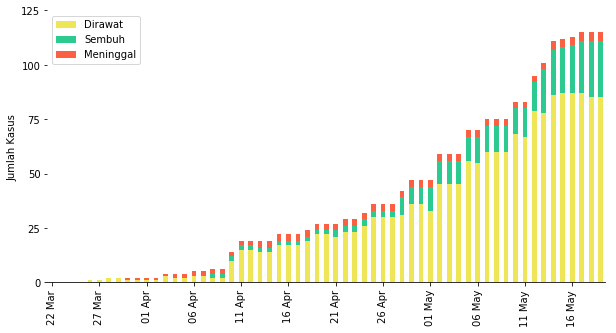

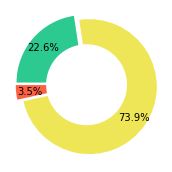

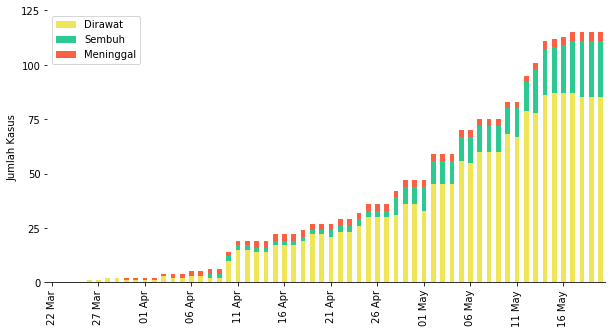

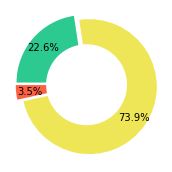

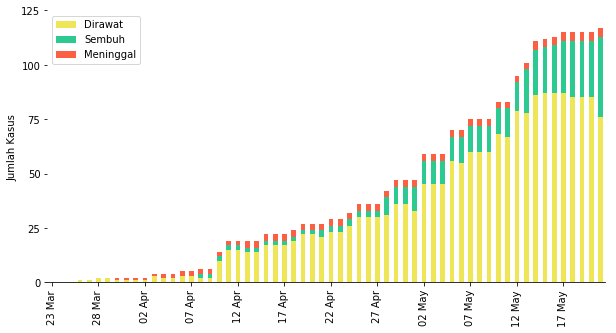

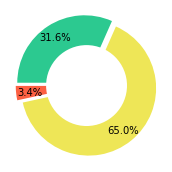

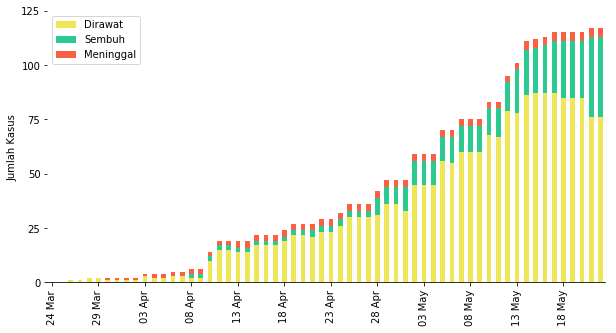

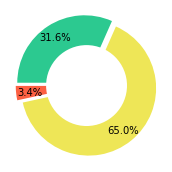

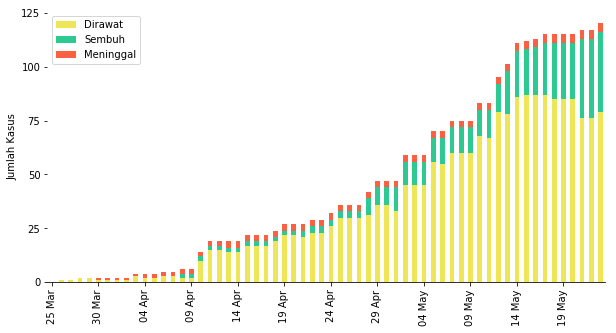

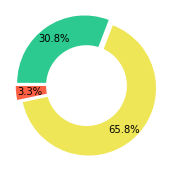

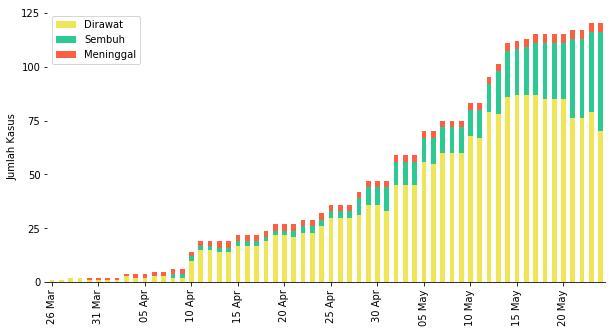

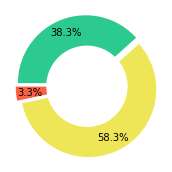

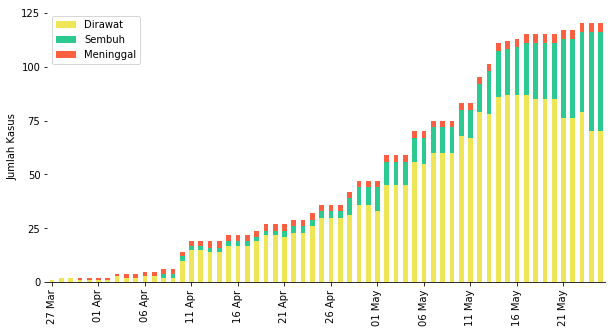

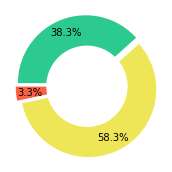

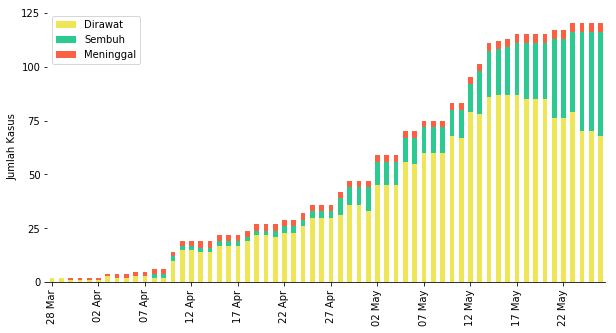

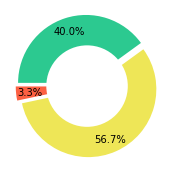

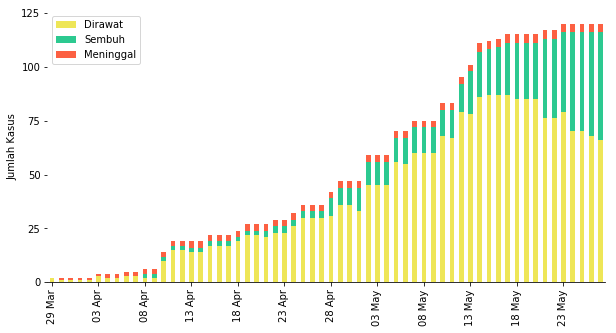

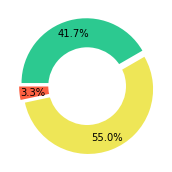

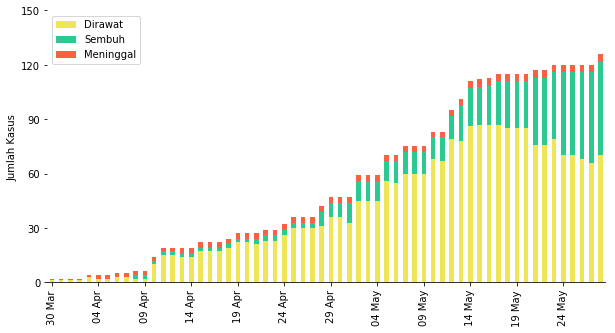

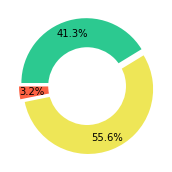

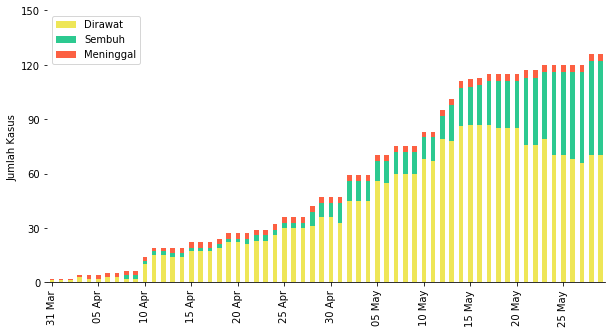

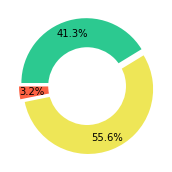

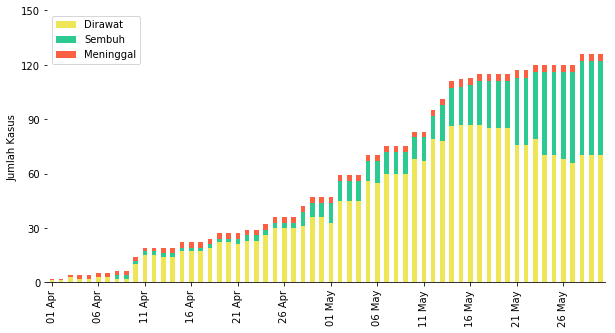

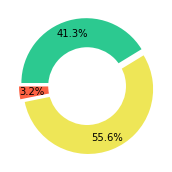

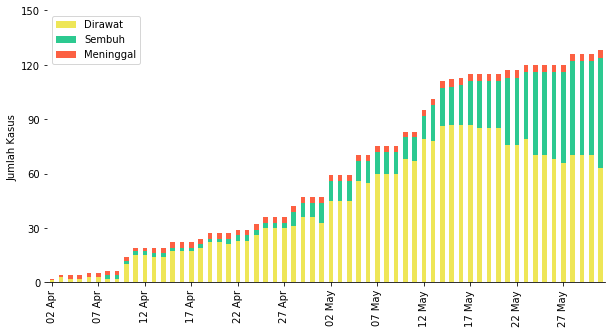

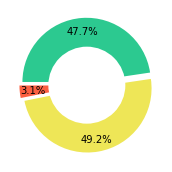

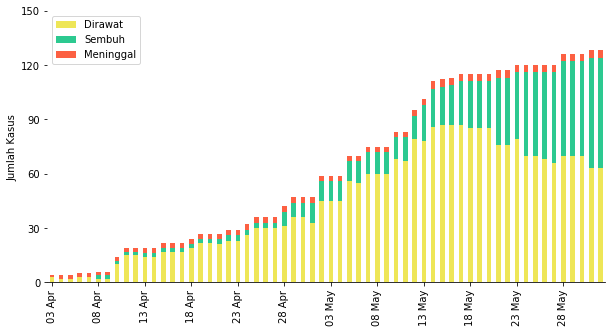

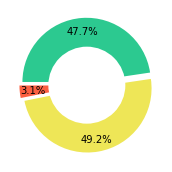

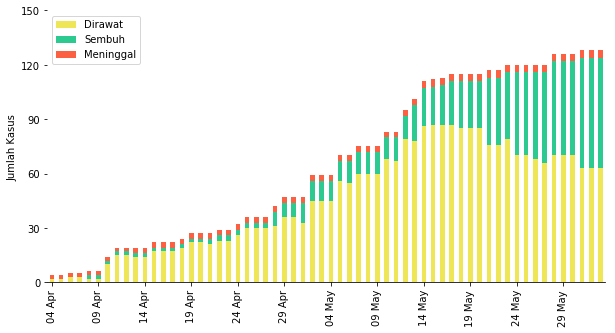

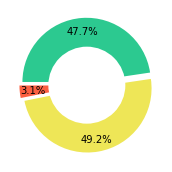

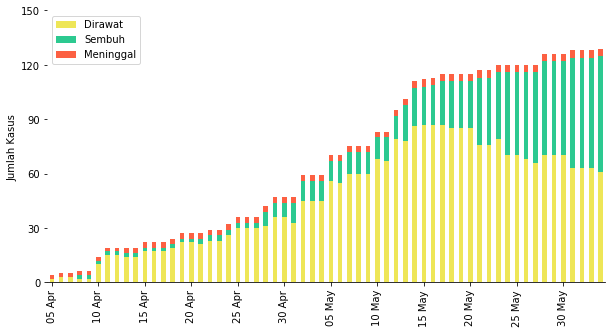

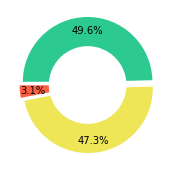

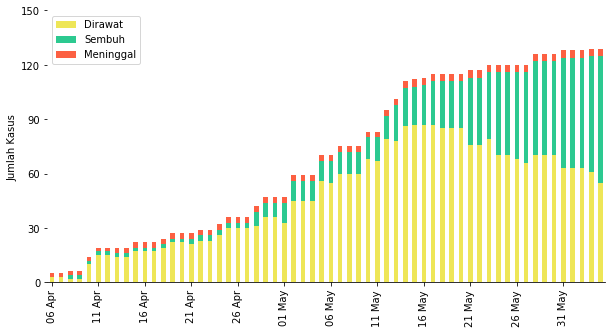

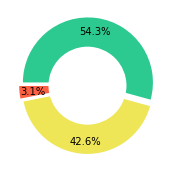

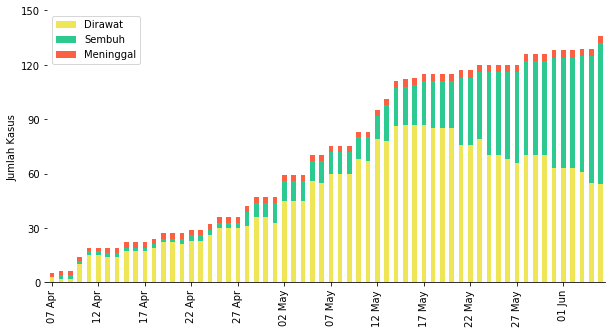

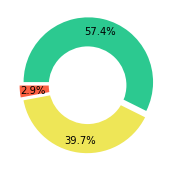

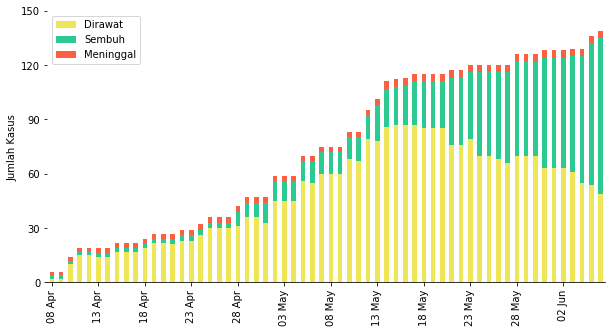

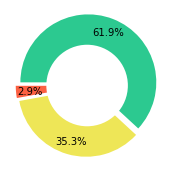

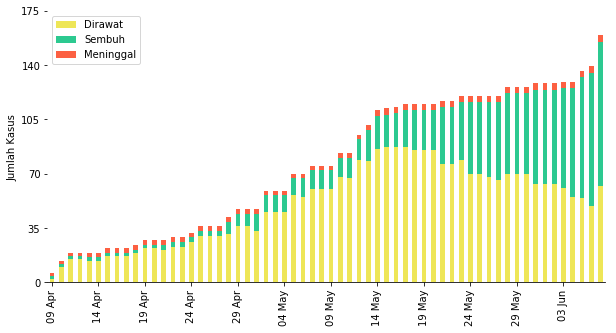

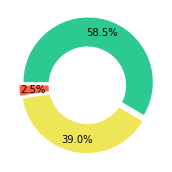

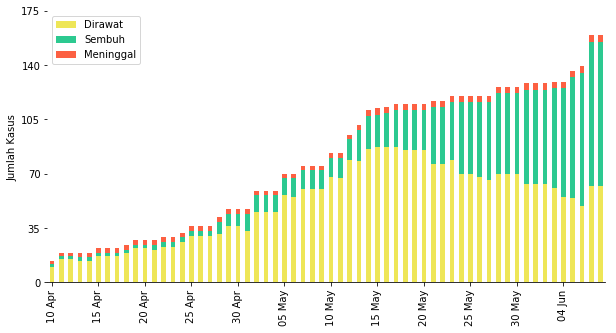

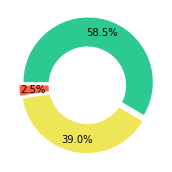

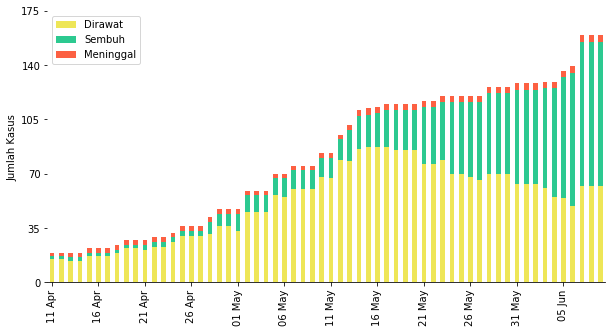

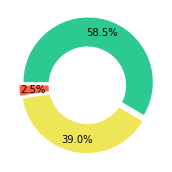

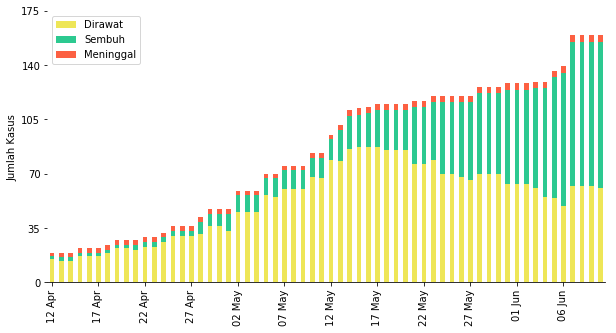

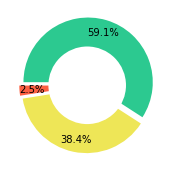

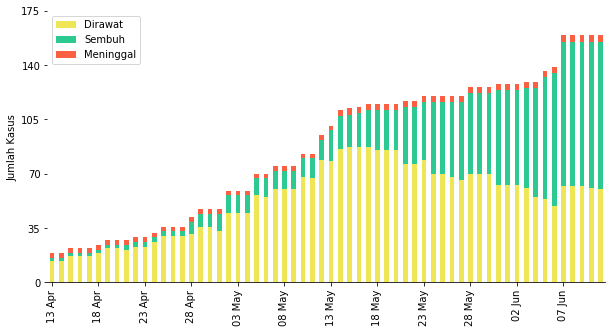

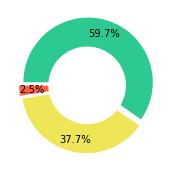

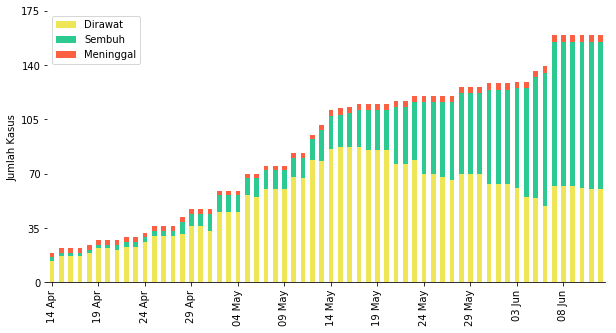

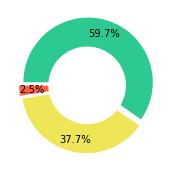

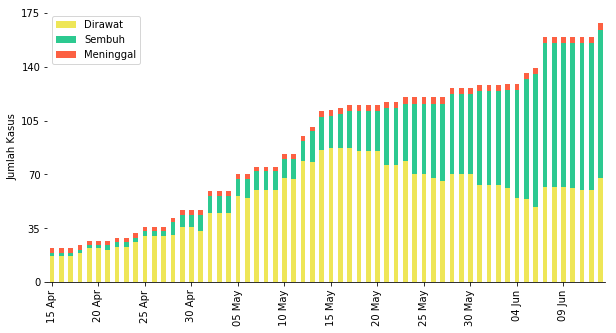

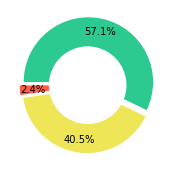

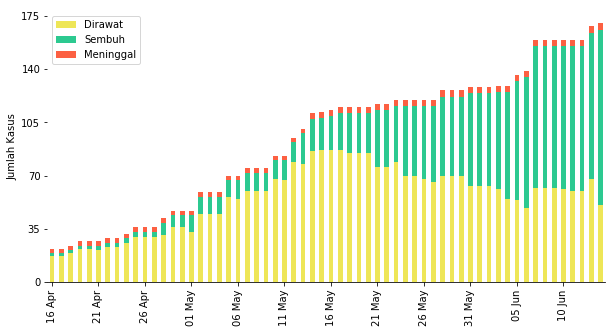

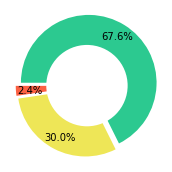

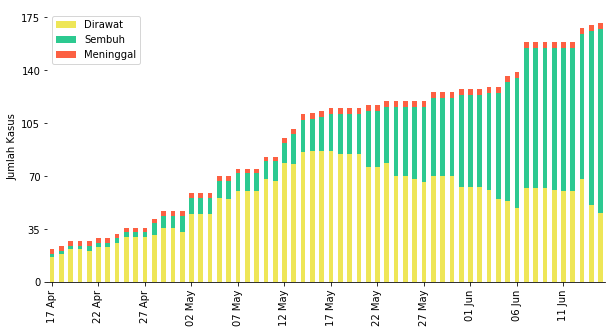

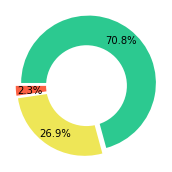

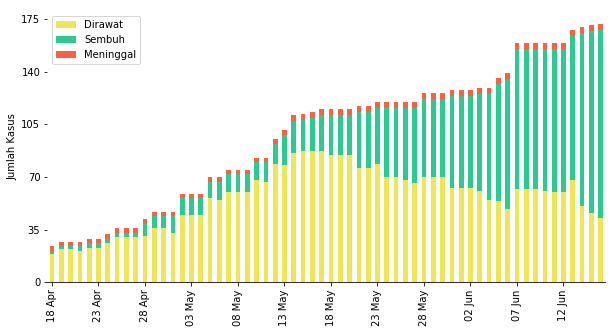

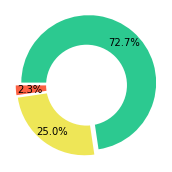

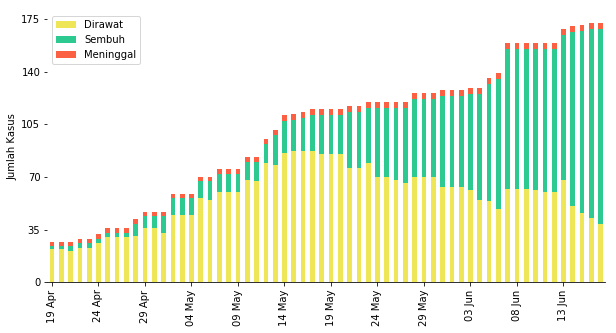

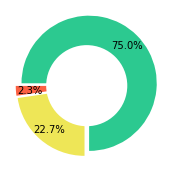

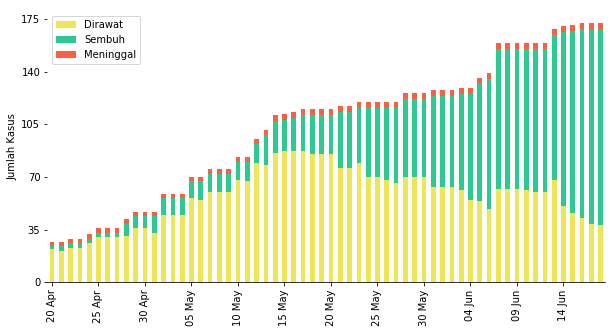

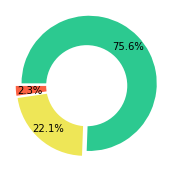

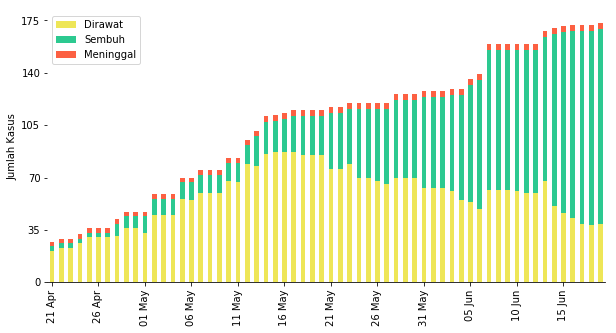

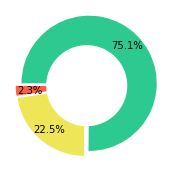

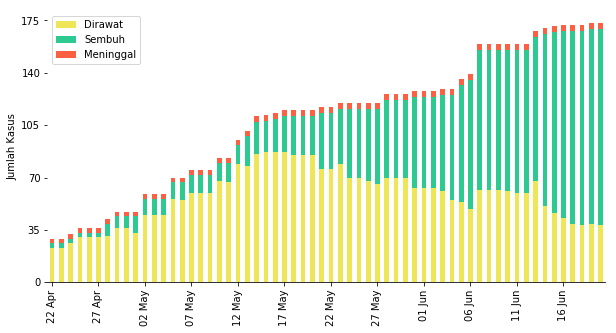

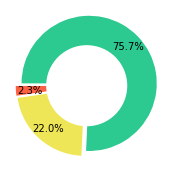

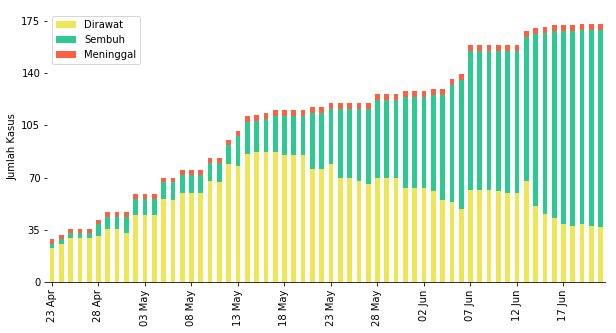

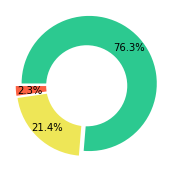

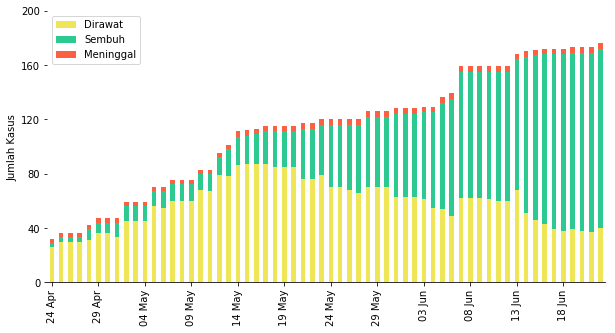

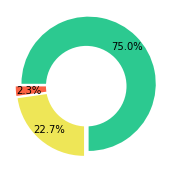

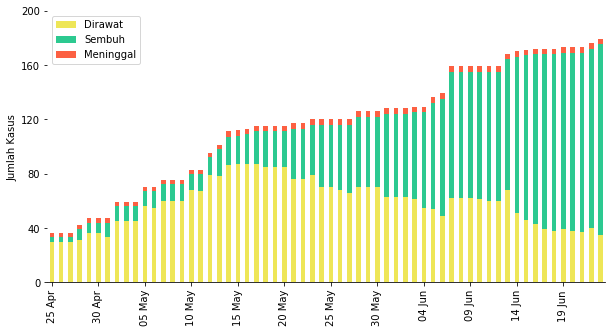

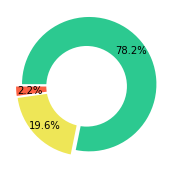

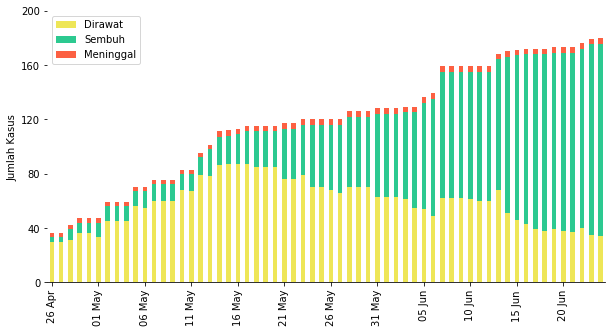

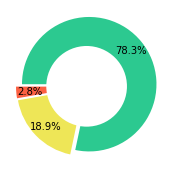

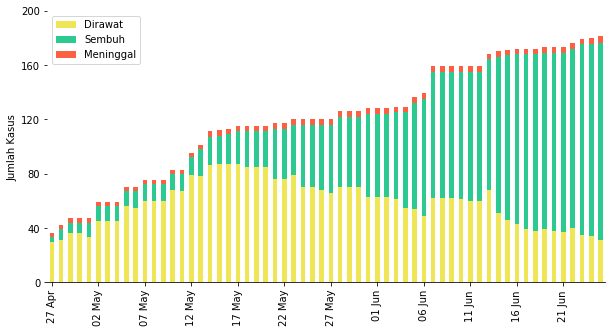

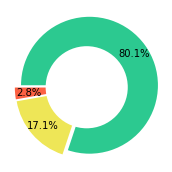

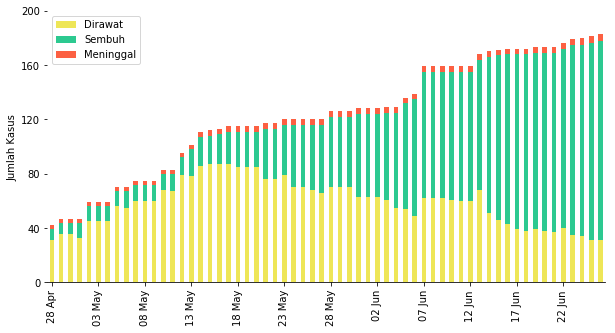

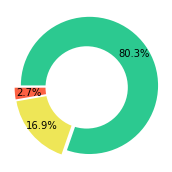

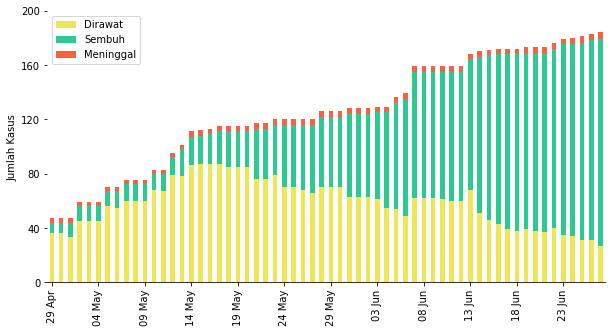

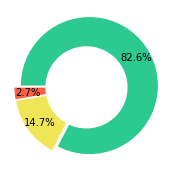

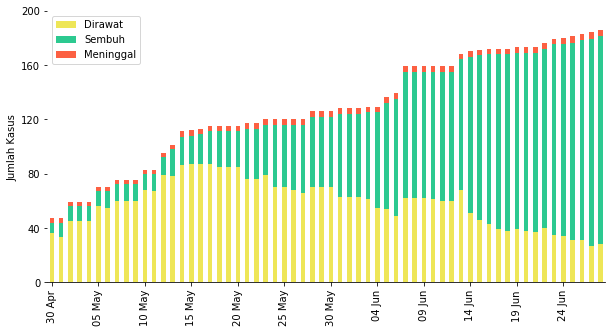

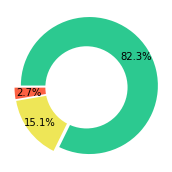

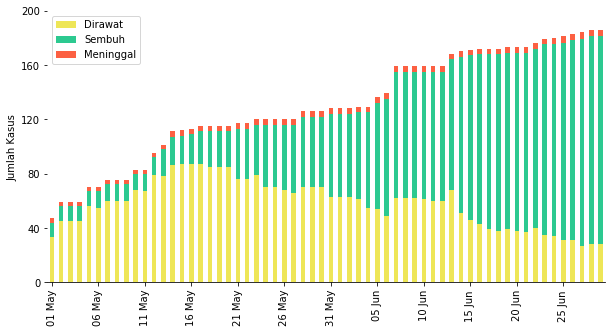

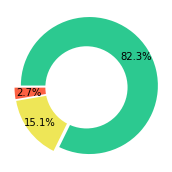

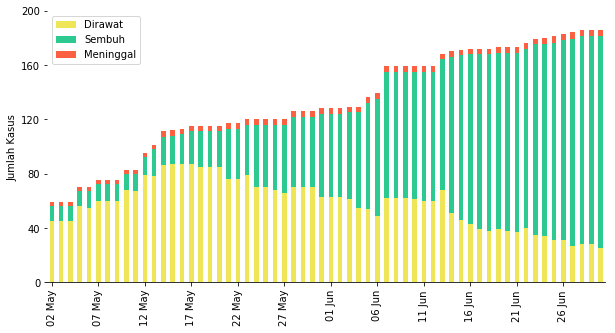

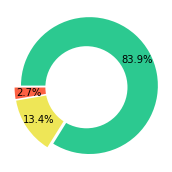

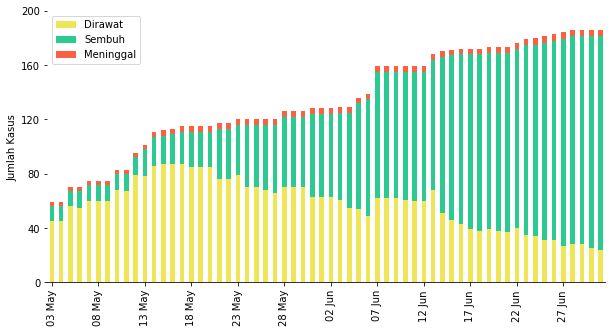

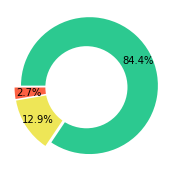

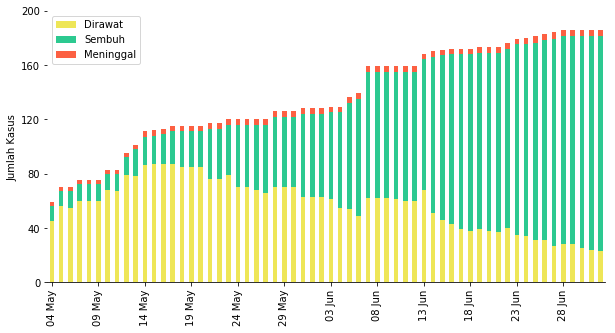

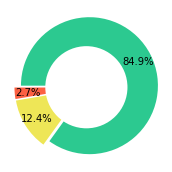

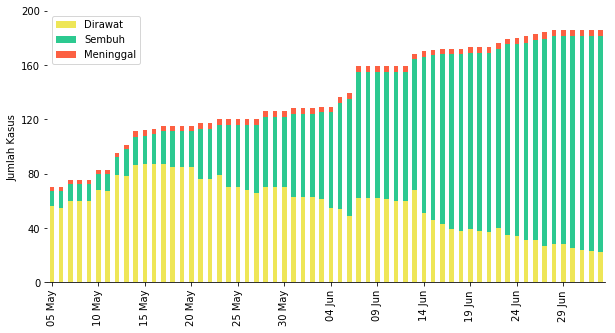

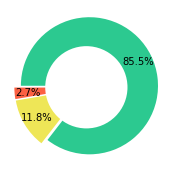

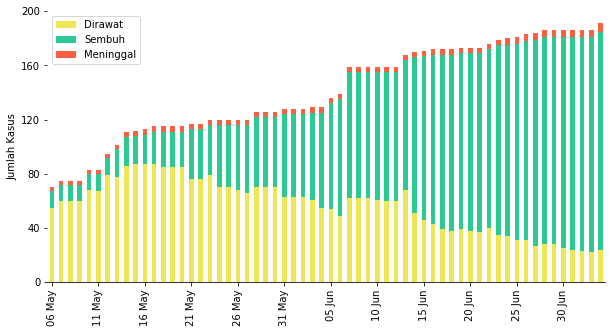

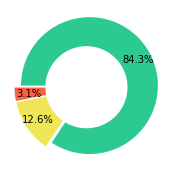

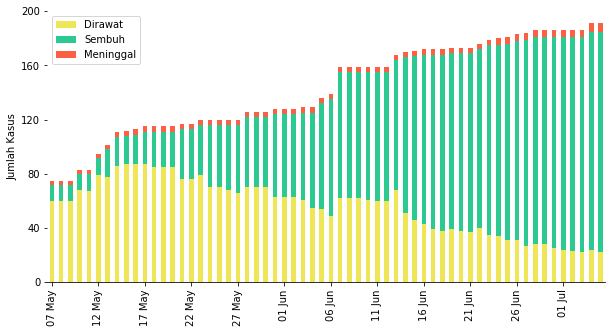

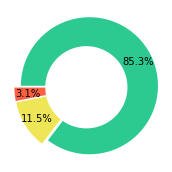

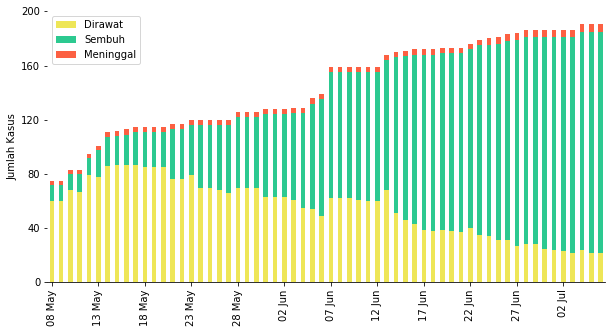

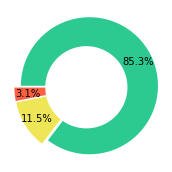

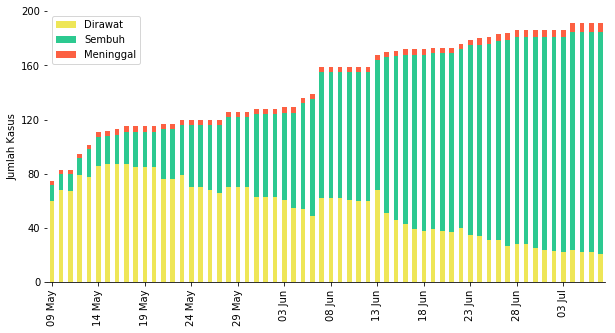

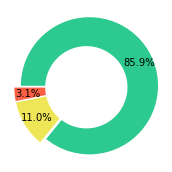

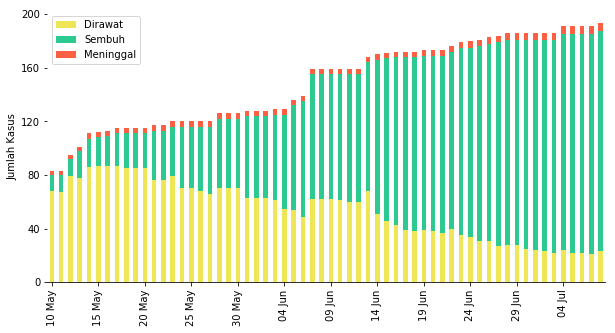

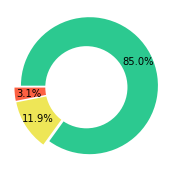

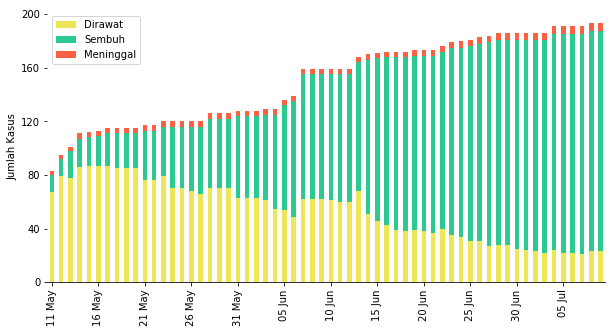

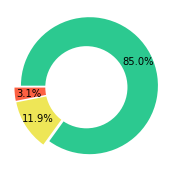

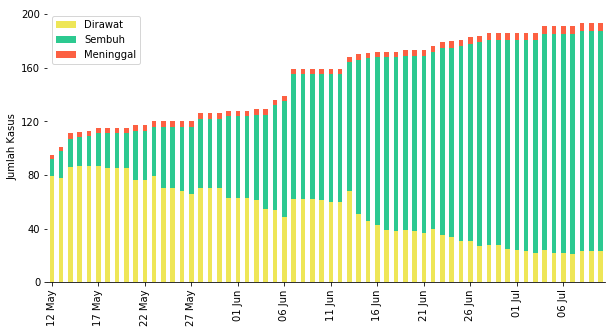

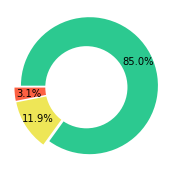

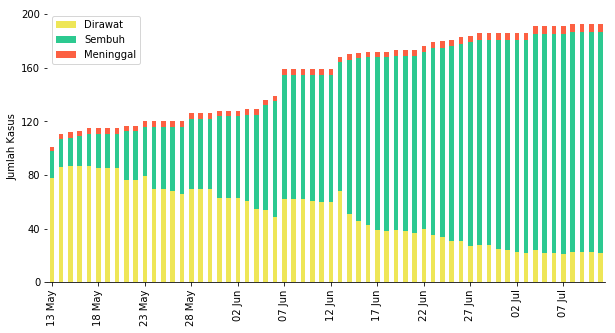

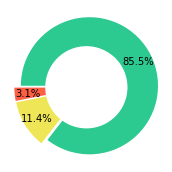

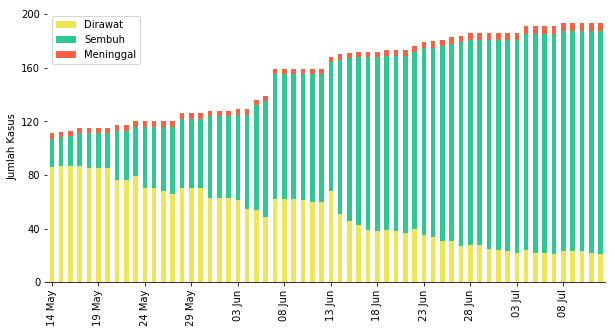

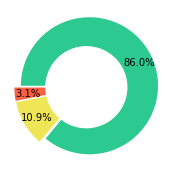

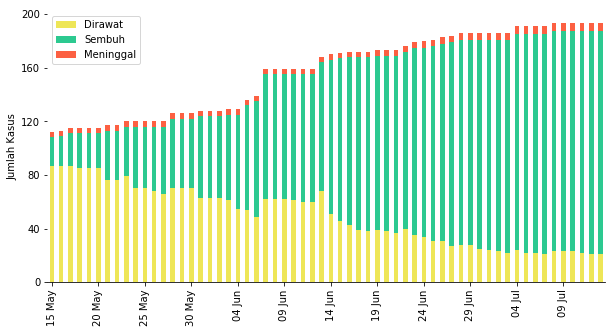

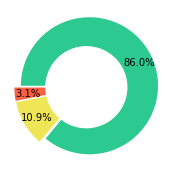

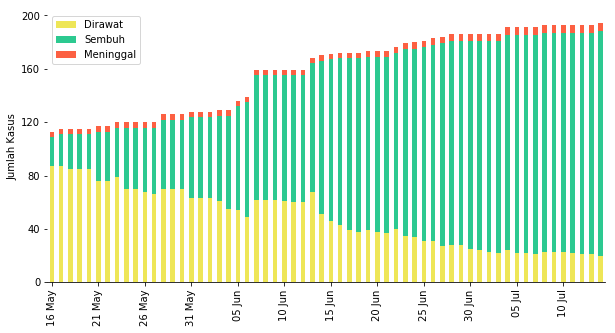

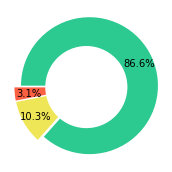

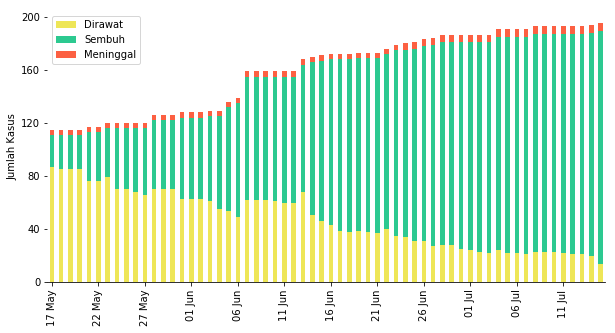

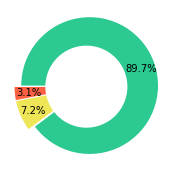

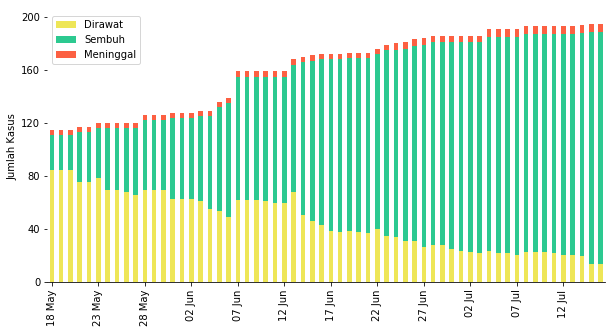

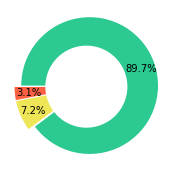

In [61]:
for i in range(10, len(total_rawat)):
    rawat = total_rawat[:i]
    sembuh = total_recovered[:i]
    meninggal = total_death[:i]
    positif = total_positive[:i]
    
    draw_bar_diagram(rawat, sembuh, meninggal, positif)
    draw_pie_chart(rawat[-1], sembuh[-1], meninggal[-1])
    make_image(i, date[i])